<a href="https://colab.research.google.com/github/HarmanSaluja20/Marks-Predictor/blob/main/Marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd

In [82]:
data = pd.read_csv("Student_Performance.csv")

In [83]:
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [80]:
data.corr()["Performance Index"]

<ipython-input-80-a203ade7b22c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Performance Index"]


Hours Studied                       0.373730
Previous Scores                     0.915189
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [84]:
import seaborn as seas

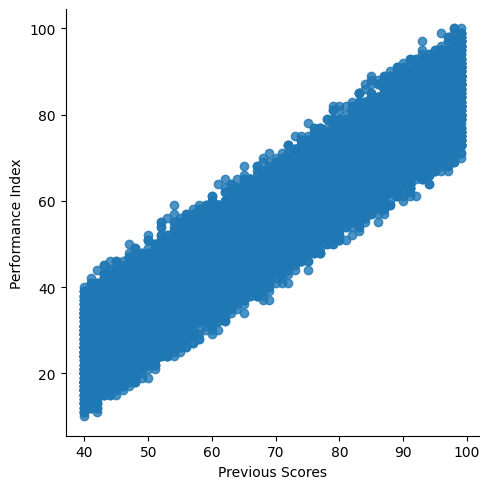

In [85]:
seas.lmplot(x="Previous Scores", y="Performance Index",data=data,fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

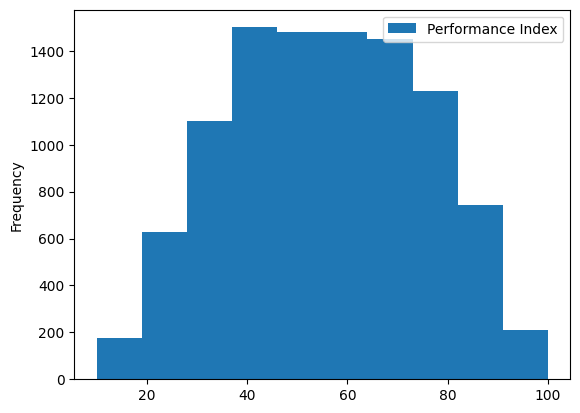

In [86]:
data.plot.hist(y="Performance Index")

In [87]:
data[data.isnull().any(axis=1)]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
train,test = train_test_split(data,test_size=0.10,random_state=41)

In [90]:
train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8593,7,85,No,8,5,76.0
9658,9,92,Yes,9,6,91.0
8408,1,78,No,6,9,50.0
9717,8,43,No,5,9,35.0
6814,2,76,No,6,1,53.0
...,...,...,...,...,...,...
8513,6,74,No,7,6,65.0
5200,2,83,Yes,8,7,64.0
4066,7,84,No,4,3,75.0
931,9,69,Yes,4,6,67.0


In [91]:
train.corr()["Performance Index"]

<ipython-input-91-2494f3e13bfd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()["Performance Index"]


Hours Studied                       0.376767
Previous Scores                     0.914946
Sleep Hours                         0.043416
Sample Question Papers Practiced    0.045176
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [92]:
test.corr()["Performance Index"]

<ipython-input-92-62170f03a90d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.corr()["Performance Index"]


Hours Studied                       0.344515
Previous Scores                     0.917807
Sleep Hours                         0.090609
Sample Question Papers Practiced    0.022649
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [104]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [103]:
predictors = ["Previous Scores","Hours Studied"]
target = "Performance Index"

In [102]:
reg.fit(train[predictors],train[target])
LinearRegression()

LinearRegression()

In [101]:
predictions = reg.predict(test[predictors])

In [108]:
predictions

array([84.97263115, 64.98944133, 72.554019  , 17.69767841, 69.06402444,
       71.73023607, 42.34003988, 34.04034236, 46.45895452, 40.30274833,
       79.44534504, 47.04354306, 59.26729237, 67.80618427, 60.67566384,
       49.08083461, 42.14517703, 31.56899358, 53.35028056, 63.97079556,
       53.7843378 , 22.59604444, 82.74047675, 27.68927332, 13.81795816,
       39.95735417, 79.44534504, 60.480801  , 53.19974926, 27.88413617,
       58.44350944, 38.30978831, 37.92006262, 42.38437142, 55.23704081,
       37.05194815, 30.9400735 , 52.57082918, 83.3250653 , 42.38437142,
       50.29434324, 72.70455031, 30.9400735 , 60.71999538, 57.46919521,
       26.04170747, 54.80298357, 49.47056031, 86.81505986, 83.13020245,
       21.96712436, 56.64541228, 46.41462298, 23.41982737, 42.18950857,
       46.06922883, 61.933504  , 39.28410255, 83.3250653 , 26.67062755,
       61.69430962, 73.72319608, 36.8570853 , 44.81138866, 84.58290546,
       38.50465116, 84.77776831, 42.18950857, 32.15358212, 89.67

In [107]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["Performance Index"],predictions)

In [106]:
test["predictions"]=predictions

In [105]:
error

1.845483626029342

In [ ]:
test[test["Performance Index"]>60]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,predictions
9745,7,93,No,6,2,84.0,84.972631
4492,5,79,Yes,4,6,67.0,64.989441
3439,8,78,No,8,7,72.0,72.554019
5372,5,83,Yes,8,9,71.0,69.064024
8343,7,80,No,6,9,68.0,71.730236
...,...,...,...,...,...,...,...
829,7,87,No,5,3,74.0,78.860756
2556,2,94,No,8,0,70.0,71.685905
1977,5,74,Yes,8,7,66.0,59.896212
2006,2,81,Yes,7,5,61.0,58.443509


In [ ]:
errors = (test["Performance Index"]-test["predictions"]).abs()

In [ ]:
errors

9745    0.972631
4492    2.010559
3439    0.554019
6077    0.697678
5372    1.935976
          ...   
9112    1.856188
1346    2.494410
2006    2.556491
458     1.767528
5958    4.023532
Length: 1000, dtype: float64

In [ ]:
error_by_hrs = errors.groupby(test["Hours Studied"]).mean()

In [ ]:
error_by_hrs

Hours Studied
1    1.801774
2    1.768661
3    1.812064
4    1.665316
5    1.673721
6    1.927880
7    2.186092
8    1.932280
9    1.892910
dtype: float64

In [ ]:
score_on_hrs = test["Performance Index"].groupby(test["Hours Studied"]).mean()

In [ ]:
accuracy=(1-(error_by_hrs/score_on_hrs))*100

In [ ]:
accuracy

Hours Studied
1    95.772011
2    96.252565
3    96.440916
4    96.941087
5    96.979833
6    96.709255
7    96.056121
8    96.997763
9    97.050431
dtype: float64

In [ ]:
mean_accuracy= accuracy.mean()

In [ ]:
mean_accuracy

96.5777757124478

In [ ]:
errors_by_prev=errors.groupby(test["Previous Scores"]).mean()

In [ ]:
score_on_prev= test["Performance Index"].groupby(test["Previous Scores"]).mean()

In [ ]:
accuracy2=(1-(errors_by_prev/score_on_prev))*100

In [ ]:
mean_accuracy2=accuracy2.mean()

In [ ]:
mean_accuracy

96.5777757124478

In [ ]:
mean_accuracy2

96.18790928145332